# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector # Import make_column_selector
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, roc_auc_score, f1_score, roc_curve)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%pip install palmerpenguins
from palmerpenguins import load_penguins

In [4]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [8]:
ct = ColumnTransformer([("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
                                        make_column_selector(dtype_include=object))], remainder = "passthrough")

penguins_pipeline = Pipeline([
        ("preprocessing", ct)
    ])

X = penguins.drop(["bill_depth_mm"], axis = 1)
y = penguins["bill_depth_mm"]

penguins_pipeline.fit(X)

transformed_x = penguins_pipeline.named_steps["preprocessing"].transform(X)
transformed_df = pd.DataFrame(transformed_x, columns=penguins_pipeline.named_steps["preprocessing"].get_feature_names_out())
transformed_df

,dummify__species_Adelie,dummify__species_Chinstrap,dummify__species_Gentoo,dummify__island_Biscoe,dummify__island_Dream,dummify__island_Torgersen,dummify__sex_female,dummify__sex_male,remainder__bill_length_mm,remainder__flipper_length_mm,remainder__body_mass_g,remainder__year
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,39.1,181.0,3750.0,2007.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,39.5,186.0,3800.0,2007.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,40.3,195.0,3250.0,2007.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,36.7,193.0,3450.0,2007.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,39.3,190.0,3650.0,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,55.8,207.0,4000.0,2009.0
329,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,43.5,202.0,3400.0,2009.0
330,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,49.6,193.0,3775.0,2009.0
331,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,50.8,210.0,4100.0,2009.0


In [9]:
# kNN where k = 3
X = penguins.drop(["species"], axis = 1)
y = penguins["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# fit first kNN model where k = 3
knn3_pipeline = Pipeline([
        ("preprocessing", ct),
        ("knn3", KNeighborsClassifier(n_neighbors= 3))
    ])

knn3_fitted = knn3_pipeline.fit(X_train, y_train)

knn3_pred_train = knn3_fitted.predict(X_train)
knn3_pred_test = knn3_fitted.predict(X_test)
knn3_prob_test = knn3_pipeline.predict_proba(X_test)

In [10]:
X = penguins.drop(["species"], axis = 1)
y = penguins["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# fit first kNN model where k = 10
knn10_pipeline = Pipeline([
        ("preprocessing", ct),
        ("knn6", KNeighborsClassifier(n_neighbors= 10))
    ])

knn10_fitted = knn10_pipeline.fit(X_train, y_train)

knn10_pred_train = knn10_fitted.predict(X_train)
knn10_pred_test = knn10_fitted.predict(X_test)
knn10_prob_test = knn10_pipeline.predict_proba(X_test)

In [11]:
tree1_pipeline = Pipeline([
        ("preprocessing", ct),
        ("knn6", DecisionTreeClassifier(ccp_alpha=1))
    ])

tree1_fitted = tree1_pipeline.fit(X_train, y_train)

tree1_pred_train = tree1_fitted.predict(X_train)
tree1_pred_test = tree1_fitted.predict(X_test)
tree1_prob_test = tree1_pipeline.predict_proba(X_test)

In [12]:
tree01_pipeline = Pipeline([
        ("preprocessing", ct),
        ("knn6", DecisionTreeClassifier(ccp_alpha=.01))
    ])

tree01_fitted = tree01_pipeline.fit(X_train, y_train)

tree01_pred_train = tree01_fitted.predict(X_train)
tree01_pred_test = tree01_fitted.predict(X_test)
tree01_prob_test = tree01_pipeline.predict_proba(X_test)


Confusion Matrix for kNN (k=3):
[[23  2  3]
 [ 9  3  1]
 [ 0  1 25]]

Confusion Matrix for kNN (k=10):
[[23  1  4]
 [ 9  3  1]
 [ 2  0 24]]

Confusion Matrix for Tree (ccp_alpha=1):
[[28  0  0]
 [13  0  0]
 [26  0  0]]

Confusion Matrix for Tree (ccp_alpha=0.01):
[[26  2  0]
 [ 3 10  0]
 [ 1  0 25]]

Evaluation Metrics:
                    Model  Accuracy  Precision    Recall  F1 Score       AUC
0              kNN (k=3)  0.761194   0.731922  0.761194  0.734452  0.876094
1             kNN (k=10)  0.746269   0.749379  0.746269  0.717214  0.903987
2     Tree (ccp_alpha=1)  0.417910   0.174649  0.417910  0.246347  0.500000
3  Tree (ccp_alpha=0.01)  0.910448   0.911940  0.910448  0.910353  0.960276


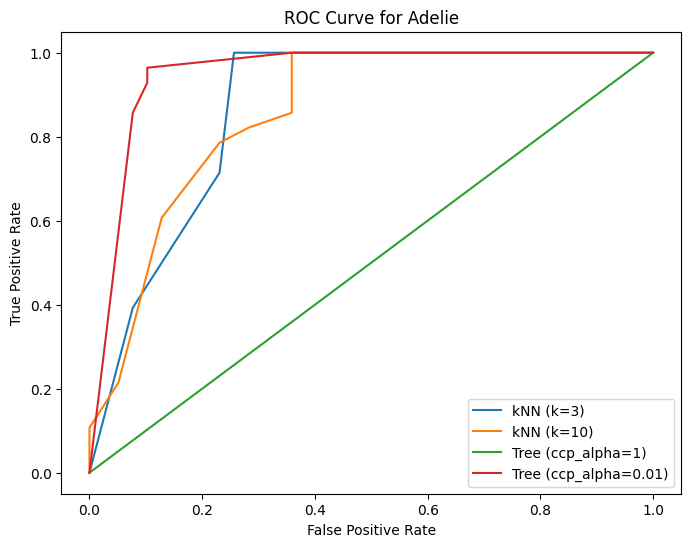

In [13]:
models = {
    "kNN (k=3)": (knn3_pred_test, knn3_prob_test),
    "kNN (k=10)": (knn10_pred_test, knn10_prob_test),
    "Tree (ccp_alpha=1)": (tree1_pred_test, tree1_prob_test),
    "Tree (ccp_alpha=0.01)": (tree01_pred_test, tree01_prob_test)
}

# Metrics for each model
results = []

for name, (y_pred, y_prob) in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(pd.get_dummies(y_test), y_prob, multi_class='ovr') if y_prob is not None else None

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc
    })

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix for {name}:\n{cm}")

# Results as a DataFrame
results_df = pd.DataFrame(results)
print("\nEvaluation Metrics:\n", results_df)

# ROC Curve for one species (e.g., Adelie)
species_label = "Adelie"  # Adjust to desired species
species_index = list(y_test.unique()).index(species_label)  # Index of desired species

plt.figure(figsize=(8, 6))
for name, (_, y_prob) in models.items():
    if y_prob is not None:
        fpr, tpr, _ = roc_curve((y_test == species_label).astype(int), y_prob[:, species_index])
        plt.plot(fpr, tpr, label=f"{name}")

plt.title(f"ROC Curve for {species_label}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()